In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, classification_report

In [3]:
## MNIST  # uncomment to use MNIST
# data_id = 554
# class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [4]:
## Fashion MNIST  # uncomment to use Fashion MNIST
data_id = 40996
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "AnkleBoot"]

In [5]:
X_all,y_all = fetch_openml(data_id=data_id, return_X_y=True, as_frame=False, parser='auto') # will return numpy arrays

In [6]:
# Use only a subset for binary classification
index = np.where((y_all == "0") | (y_all == "6"))[0]
X = X_all[index].copy()
y = y_all[index].copy()

# X = X_all.copy()
# y = y_all.copy()

In [7]:
# Scale the X's
if X.max() > 1:
    X = X/255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test = X[:60000], X[60000:]
# y_train, y_test = y[:60000], y[60000:]

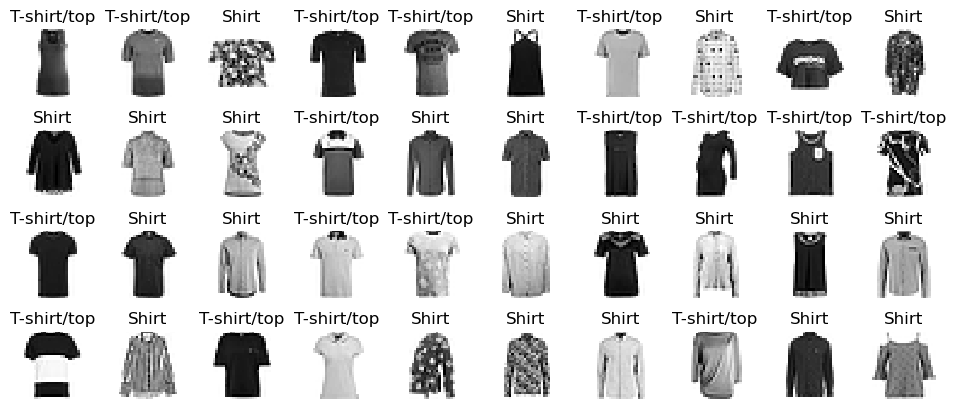

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index].reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(y_train[index])])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
model = RandomForestClassifier(max_depth=8, n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=50)

In [21]:
yhat_train = model.predict(X_train)
yhat = model.predict(X_test)

In [22]:
print(accuracy_score(y_train, yhat_train))
print(accuracy_score(y_test, yhat))

0.9097321428571429
0.8485714285714285


In [23]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1379
           6       0.89      0.81      0.84      1421

    accuracy                           0.85      2800
   macro avg       0.85      0.85      0.85      2800
weighted avg       0.85      0.85      0.85      2800



In [24]:
confusion_matrix(y_test, yhat,)

array([[1232,  147],
       [ 277, 1144]])

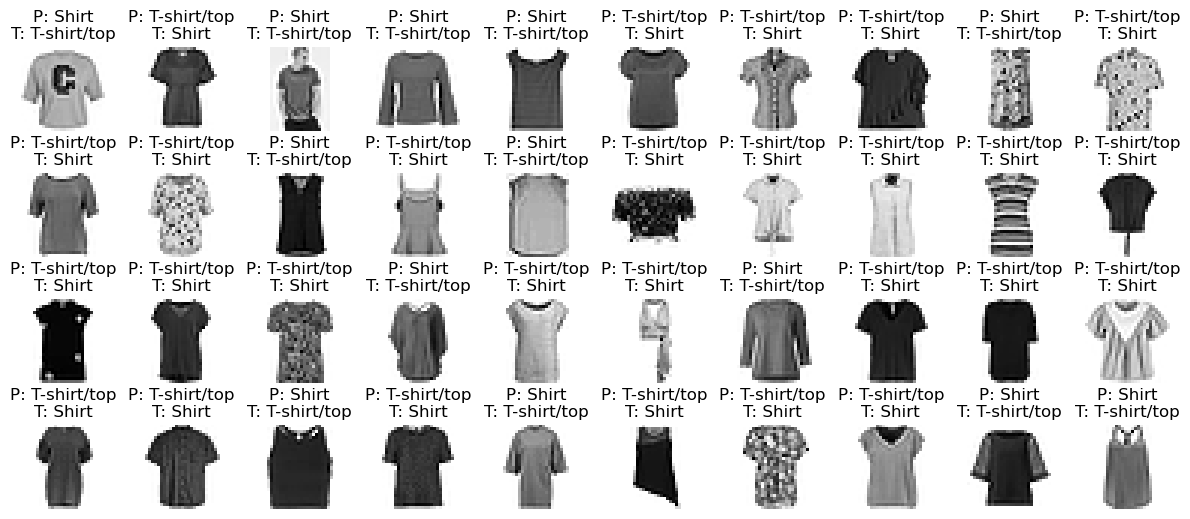

In [25]:
### Look at some misclassified points 

misclassified_indices = np.where(yhat != y_test)[0]

n_rows = 4
n_cols = 10
n_plots = n_rows * n_cols


plot_indices = misclassified_indices[:n_plots]

plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))

for i, misclassified_index in enumerate(plot_indices):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X_test[misclassified_index].reshape(28,28), cmap="binary", interpolation="nearest")
    plt.axis('off')
    # Title with predicted (wrong) and true labels
    plt.title(f"P: {class_names[int(yhat[misclassified_index])]}\nT: {class_names[int(y_test[misclassified_index])]}")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [27]:
model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 3.05503328e-05, 3.94854078e-05,
       4.76107469e-05, 1.59889053e-04, 1.12062069e-04, 4.89602897e-04,
       3.83300635e-04, 3.95293272e-04, 5.87331130e-04, 4.36592789e-03,
       9.15675065e-04, 6.05580325e-04, 5.53637803e-04, 1.10729960e-03,
       1.13971049e-03, 4.55066071e-03, 1.04431529e-03, 9.52034855e-04,
       2.78947245e-04, 2.23625383e-04, 1.00118474e-04, 1.03652699e-04,
       3.98885665e-05, 2.13098225e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.03939938e-05, 5.52729735e-05,
       1.64593261e-04, 2.99014010e-04, 5.11876846e-04, 1.07951705e-03,
       7.38381299e-04, 1.39472109e-03, 6.49517908e-03, 1.53902856e-03,
       8.32337244e-04, 1.70562882e-03, 1.66685045e-03, 1.24554288e-03,
       1.19905530e-03, 3.31660627e-03, 2.66456634e-03, 1.87825324e-03,
       1.97302342e-03, 4.13976443e-04, 2.97130697e-04, 1.71629906e-04,
       3.09656850e-05, 3.53492582e-05, 7.54036491e-05, 0.00000000e+00,
      

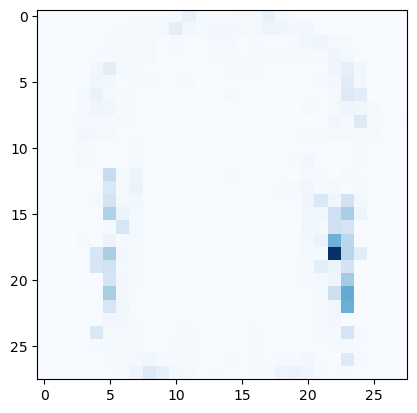

In [28]:
plt.imshow(model.feature_importances_.reshape(28,28),  cmap='Blues', interpolation="nearest");